In [20]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px


df_artistas = pd.read_csv("spotify_artists.csv")

df_albuns = pd.read_csv("spotify_albums.csv")

df_tracks = pd.read_csv("spotify_tracks.csv")



LIMPEZA DOS ARTISTAS

In [21]:

df_artistas.head()

df_artistas.describe()

,Unnamed: 0,artist_popularity,followers
count,56129.000000,56129.000000,5.612900e+04
mean,28064.000000,34.387447,7.796041e+04
std,16203.190967,16.917287,5.942273e+05
min,0.000000,0.000000,0.000000e+00
25%,14032.000000,22.000000,1.820000e+02
50%,28064.000000,34.000000,1.734000e+03
75%,42096.000000,46.000000,1.520300e+04
max,56128.000000,100.000000,4.156169e+07


In [22]:
df_artistas[df_artistas.isnull().any(axis=1)]
df_artistas.dropna(inplace = True)
df_artistas.isnull().sum()


Unnamed: 0           0
artist_popularity    0
followers            0
genres               0
id                   0
name                 0
track_id             0
track_name_prev      0
type                 0
dtype: int64

In [23]:
df_artistas.loc[(df_artistas['followers'] == 0) & (df_artistas['artist_popularity'] >= 10)]


,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
25,25,21,0,[],6CJCoqivxcdr8zlVeSsoH8,Reiko Tsuiki,7Bdop7N4EKLMk4riEXQMix,track_92,artist
107,107,20,0,[],6WxTDr3eh88JEx91Lg3vv4,Roldán Bernabé,2r3q57FhxdsCyYr0kuDq4b,track_28,artist
115,115,22,0,[],1BEyKcixGeLyvFwGANJj8l,Carl Philipp Emanuel,3G3qLFFcPo4khWwE1AwrJO,track_64,artist
127,127,26,0,[],2c7DYeJYKrfO53y45HlLSd,Léo margue,56fBsCXwpBnxe4JkF66gyF,track_77,artist
159,159,24,0,[],7jLr9hLgm1Ly5PNgVAXKnS,Joseph Havlat,3N01VrOyYKruhFbFpHxJN8,track_97,artist
...,...,...,...,...,...,...,...,...,...
54742,54742,19,0,[],3OFWImEAUL4Mqc0yH2A0Rg,Sam is Ohm,6sUu8m3B4qFTu4ri6aZCYy,track_33,artist
54975,54975,23,0,[],2qhzBq0hWOUmozxHlQwkEf,Santiago Casillas,49zsWIsemW6woEnCZl4xVX,track_8,artist
55008,55008,14,0,[],16eNAQjrGCpFW1urlZToih,Normsters,59rk8rcGKiamC7rU5N7tg1,track_50,artist
55772,55772,24,0,[],3hG7itMdTJT8vc0JYh771M,Broken Legacy,3K3mUDPEx0sbqBWDMPmaWM,track_30,artist


In [24]:

artistas_deletados = df_artistas[(df_artistas['followers'] == 0) & (df_artistas['artist_popularity'] >= 10)].index
df_artistas.drop(artistas_deletados, inplace=True)
df_artistas.loc[df_artistas['followers'] == 0] 



,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
53,53,2,0,[],7uLlA3ipeSM7lUSmrh455d,BiGz,0ebArfrdaqfhwOmBPe2oMt,track_110,artist
245,245,4,0,[],5ImRopHLaLeCh23taUFeQI,Nancy Cano,7xeszoUWLV5Jz1VR5awhmu,track_60,artist
255,255,5,0,[],34GjZMS9OneCAzsZxToZyM,Ana María Villa,4WowPWhLtNjSw47YlRX63e,track_28,artist
366,366,8,0,[],3i82WaTcb8WxFUVBZ3K9e9,"DavidSaysum,",4tcKuKSNzcESuCUEQxU9in,track_95,artist
421,421,8,0,[],3Al9GU79Ub3McLmeUe0uhq,W.W,4tcKuKSNzcESuCUEQxU9in,track_94,artist
...,...,...,...,...,...,...,...,...,...
50256,50256,9,0,[],4XjelGcSoY1umJ8sZHCoKM,Kiron Kher,76BlL0Pb2QccsIT0Knc2lN,track_77,artist
52298,52298,0,0,[],6CQX8YuLIGn1V46HsGD5yx,Gayatri Joshi,5oWOpXwjCjbELEAp2zKR0x,track_51,artist
52545,52545,1,0,[],662lPxsU7H55XOg1kUQ2gw,Regina Elena Mesquita,4RcJjeiYgUIFM72QNxBP7D,track_62,artist
55068,55068,0,0,[],2AAm5XYeMlucDFPZ2rEhkU,Amrita Singh,7FHDGu4eb2ZXOMZUVAQSCa,track_17,artist


In [25]:
df_artistas.drop_duplicates(inplace = True)
df_artistas.nunique()

Unnamed: 0           55922
artist_popularity       99
followers            22735
genres               13314
id                   55922
name                 55308
track_id             44852
track_name_prev        335
type                     1
dtype: int64

In [26]:
df_artistas['followers'].describe()

count    5.592200e+04
mean     7.824897e+04
std      5.953071e+05
min      0.000000e+00
25%      1.870000e+02
50%      1.764000e+03
75%      1.533575e+04
max      4.156169e+07
Name: followers, dtype: float64

In [27]:

def drop_outliers(base, variavel):
    outliers = []
    # Calcula Q1 (25º percentil) para a variável dada
    Q1 = np.percentile(base[variavel], 25)
    
    # Calcula Q3 (75º percentil) para a variável dada
    Q3 = np.percentile(base[variavel], 75)
    
    # Usa IQR (interquartile range) para calcular um passo de outlier
    IQR = Q3-Q1
    passo = 1.5 * IQR
    
    # Mostrando os outliers
    print("Pontos considerados outliers para a variável'{}':".format(variavel))
    display(base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))])
    
    feature_outliers = base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))]
    outliers.extend(list(feature_outliers.index.values))
    
    return outliers

outliers = drop_outliers(df_artistas, 'followers')
df_artistas = df_artistas.loc[~df_artistas.index.isin(outliers)].reset_index(drop=True)
df_artistas['followers'].describe()

Pontos considerados outliers para a variável'followers':


,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
11,11,53,373085,"['pagode', 'sertanejo', 'sertanejo pop', 'sert...",0ozdcqmICsOZDe7eJQVzrp,Rick & Renner,1x0nDKfYDed4qcRNWxOoZv,track_1,artist
22,22,52,250846,"['sertanejo', 'sertanejo tradicional', 'sertan...",7HUHsmvWREkN4l179tvpBe,Chrystian & Ralf,1d5kwhPv0q2GMTHQz9OEAZ,track_20,artist
33,33,53,39458,"['diva house', 'hip house', 'urban contemporar...",5UoVLCWzOKMIJ9iioof9OD,CeCe Peniston,4dwwiDqMNaBHeSrH3IHv62,track_36,artist
44,44,62,262503,"['blues', 'blues-rock', 'classic rock', 'folk'...",06nsZ3qSOYZ2hPVIMcr1IN,J.J. Cale,2pTK0kJECu2oA4rbIvU9Tw,track_4,artist
49,49,58,575707,"['pagode', 'sertanejo', 'sertanejo pop', 'sert...",6zpNfYJcPavd1pqLXKiSvl,Edson & Hudson,6c63XoLOW95ZK6J4vtDY2X,track_13,artist
...,...,...,...,...,...,...,...,...,...
56116,56116,80,7093119,"['dance pop', 'hip pop', 'pop', 'post-teen pop...",6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,0v3BMLcwUmAwyqJaf5997o,track_69,artist
56120,56120,83,1726953,"['dance pop', 'edm', 'pop', 'tropical house']",1HBjj22wzbscIZ9sEb5dyf,Jonas Blue,4M8x1TR36VMQMFMbGCdoyA,track_86,artist
56121,56121,70,50315,['pop house'],4EPJlUEBy49EX1wuFOvtjK,Becky Hill,4M8x1TR36VMQMFMbGCdoyA,track_87,artist
56125,56125,42,57973,"['aggro chileno', 'andean', 'chilean rock', 'l...",1OgaghfYd1qr8DFoNrfDNk,Sinergia,0rXhmIYRPIoVYstJdZt4uq,track_21,artist


count    46795.000000
mean      4567.819062
std       7792.246763
min          0.000000
25%        123.000000
50%        884.000000
75%       4956.000000
max      38055.000000
Name: followers, dtype: float64

LIMPEZA ALBUNS

In [28]:
df_albuns.head()

,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [29]:
df_albuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

In [30]:
df_albuns[df_albuns.isnull().any(axis=1)]
df_albuns.dropna(inplace = True)
df_albuns = df_albuns.drop_duplicates()
df_albuns.isnull().sum()



Unnamed: 0                0
album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

In [31]:
df_albuns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

In [32]:
df_albuns.head()

,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [33]:
df_albuns['release_date'] = pd.to_datetime(df_albuns['release_date'], errors='coerce')



LIMPEZA TRACKS

In [34]:
df_tracks.head()    

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [35]:
print(df_tracks.columns)


Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')


In [36]:

print(df_tracks.head())
print(df_tracks.info())
print(df_tracks.isnull().sum())

duplicatas = df_tracks.duplicated()
print("Número total de linhas duplicadas:", duplicatas.sum())

duplicatas_album = df_tracks.duplicated(subset='album_id')
print("Número de álbuns duplicados:", duplicatas_album.sum())

df_tracks_albuns = df_tracks.groupby('album_id').agg({
    'popularity': 'mean',   
    'danceability': 'mean', 
    'energy': 'mean',       
    'valence': 'mean',         
    'tempo': 'mean',           
    'duration_ms': 'sum',      
    'track_id': 'count'
}).reset_index()

df_tracks_albuns.rename(columns={'id': 'num_tracks'}, inplace=True)

df_tracks_albuns = df_tracks_albuns.merge(
    df_tracks[['album_id', 'artists_id']].drop_duplicates(subset='album_id'),
    on='album_id',
    how='left'
)

print(df_tracks_albuns.head())

df_tracks_sorted = df_tracks_albuns.sort_values(by='popularity', ascending=False)
print(df_tracks_sorted.head(10))


   Unnamed: 0  acousticness                album_id  \
0           0         0.294  0D3QufeCudpQANOR7luqdr   
1           1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2           2         0.750  4tKijjmxGClg4JOLAyo2qE   
3           3         0.763  6FeJF5r8roonnKraJxr4oB   
4           4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

KeyError: "Column(s) ['track_id'] do not exist"

MERGE

In [ ]:
print("Colunas de df_albums:")
print(df_albuns.columns)

print("\nColunas de df_artists:")
print(df_artistas.columns)


In [ ]:
df_albuns.rename(columns={'name': 'album_name'}, inplace=True)

df_artistas.rename(columns={
    'id': 'artist_id',
    'name': 'artist_name'
}, inplace=True)


In [ ]:
print(df_albuns.isnull().sum())
print(df_artistas.isnull().sum())


In [ ]:
df_merged = pd.merge(
    left=df_albuns,
    right=df_artistas,
    on='artist_id',
    how='left'
)

print(df_merged.head())
print(df_merged.columns)


In [ ]:
df_merged = pd.merge(
    df_albuns, 
    df_artistas, 
    on='artist_id', 
    how='left',
    suffixes=('_albums', '_artists')
)

print(df_albuns.columns)
print(df_artistas.columns)


KeyError: 'artist_id'

In [ ]:
df_albuns.rename(columns={'track_id': 'track_id_alb'}, inplace=True)

df_merged = pd.merge(
    df_albuns,
    df_artistas,
    left_on='artist_id',
    right_on='artist_id',
    how='left',
    suffixes=('_alb', '_art')
)


In [ ]:
df_merged.head()
df_merged.info()


In [ ]:


print("df_albums columns:", df_albuns.columns)
print("df_artists columns:", df_artistas.columns)
print("df_tracks columns:", df_tracks.columns)


In [ ]:
df_tracks.rename(columns={'id': 'track_id'}, inplace=True)

df_artistas.rename(columns={'id': 'artist_id'}, inplace=True)

df_albuns_artistas = pd.merge(
    df_albuns,
    df_artistas,
    on='artist_id',      
    how='left',         
    suffixes=('_alb', '_art')  
)

df_final = pd.merge(
    df_albuns_artistas,
    df_tracks,
    on='track_id',       
    how='left',          
    suffixes=('_prev', '_tck')  
)


In [ ]:
df_final.info()
df_final.head()


In [ ]:
df_final.columns


In [ ]:
df_final.drop(['external_urls', 'images', 'Unnamed: 0', 'href_prev', 'href_tck', 
               'track_href', 'uri_prev', 'uri_tck', 'analysis_url', 'track_name_prev_art', 
               'Unnamed: 0_art', 'Unnamed: 0_alb', 'release_date_precision', 'type_alb', 
               'type_art', 'type', 'track_name_prev_alb', 'track_name_prev', 'preview_url', 
               'lyrics'],  
              axis=1, inplace=True, errors='ignore')  

df_final.columns


Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence', 'albuns_popularity'],
      dtype='object')

In [ ]:

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   album_type              75511 non-null  object        
 1   artist_id               75511 non-null  object        
 2   available_markets_prev  75511 non-null  object        
 3   id                      75511 non-null  object        
 4   album_name              75511 non-null  object        
 5   release_date            69620 non-null  datetime64[ns]
 6   total_tracks            75511 non-null  int64         
 7   track_id_alb            75511 non-null  object        
 8   artist_popularity       43732 non-null  float64       
 9   followers               43732 non-null  float64       
 10  genres                  43732 non-null  object        
 11  artist_name             43732 non-null  object        
 12  track_id                43732 non-null  object

In [ ]:
df_final.head()

,album_type,artist_id,available_markets_prev,id,album_name,release_date,total_tracks,track_id_alb,artist_popularity,followers,...,mode,name,playlist,popularity,speechiness,tempo,time_signature,track_number,valence,albuns_popularity
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,6,2iejTMy9XZ8Gaae0aQ2yl0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,8,1WQfghEjszJJ4H8MAWrQ2C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7nLYY7uAVUb57kpd7tZxnS,Take My Bass,2019-03-14,1,3jJKj4QTK3v18ZSwpk7AcV,18.0,118.0,...,1.0,Take My Bass,Bangers,4.0,0.0669,126.060,4.0,1.0,0.448,4.0
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),2016-11-16,1,1xGtDafUZbHyYC3Xarcbrj,24.0,309.0,...,1.0,BNO,Hård træning,28.0,0.0659,150.030,4.0,1.0,0.329,28.0
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1XeoOqC1q7U2iyLEQJ64cu,Sunshine,2018-07-20,1,0gWtsXvXOzAT6FtM3ur8in,24.0,1394.0,...,0.0,Mi Candelita,Entre los Andes,30.0,0.1000,160.136,4.0,1.0,0.842,30.0


In [ ]:
# Calcular a média da popularidade das músicas dentro de cada álbum
album_popularity = df_final.groupby('album_id')['popularity'].mean().reset_index()

# Renomear a coluna para evitar confusão
album_popularity.rename(columns={'popularity': 'albuns_popularity'}, inplace=True)

# Mesclar essa informação de volta ao DataFrame principal
df_final = df_final.merge(album_popularity, on='album_id', how='left')


df_final['albuns_popularity'] = albuns_popularity



df_final.head()

,album_type,artist_id,available_markets_prev,id,album_name,release_date,total_tracks,track_id_alb,artist_popularity,followers,...,time_signature,track_number,valence,albuns_popularity_x,duration_min,release_month,release_day,release_weekday,albuns_popularity_y,albuns_popularity
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,6,2iejTMy9XZ8Gaae0aQ2yl0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,8.0,Friday,NaN,NaN
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,8,1WQfghEjszJJ4H8MAWrQ2C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,Friday,NaN,NaN
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7nLYY7uAVUb57kpd7tZxnS,Take My Bass,2019-03-14,1,3jJKj4QTK3v18ZSwpk7AcV,18.0,118.0,...,4.0,1.0,0.448,4.0,3.174600,3.0,14.0,Thursday,4.0,4.0
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),2016-11-16,1,1xGtDafUZbHyYC3Xarcbrj,24.0,309.0,...,4.0,1.0,0.329,28.0,2.614217,11.0,16.0,Wednesday,28.0,28.0
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1XeoOqC1q7U2iyLEQJ64cu,Sunshine,2018-07-20,1,0gWtsXvXOzAT6FtM3ur8in,24.0,1394.0,...,4.0,1.0,0.842,30.0,3.671550,7.0,20.0,Friday,30.0,30.0


Análise descritiva e visualização

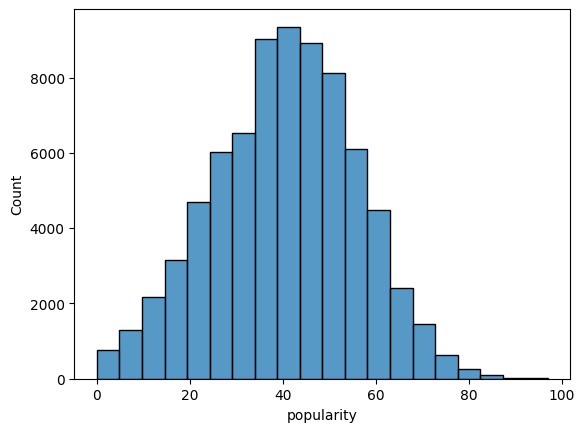

In [ ]:
sns.histplot(data=df_tracks_albuns, x='popularity', bins=20)
plt.show()


Lista

In [ ]:

df_albuns_sorted = df_final.sort_values(by='popularity', ascending=False)


colunas_de_interesse = ['album_id', 'popularity', 'total_tracks', 'artists_id']
df_albuns_rank = df_albuns_sorted[colunas_de_interesse]


top_10_albuns = df_albuns_rank.head(10)
print(top_10_albuns)


                     album_id  popularity  total_tracks  \
55318  429B3se6xtZuvblNnS2iy7        87.0             1   
55564  429B3se6xtZuvblNnS2iy7        87.0             1   
55024  4OyP4eAtpTHXjpVBjJvPNG        87.0             6   
70243  429B3se6xtZuvblNnS2iy7        87.0             1   
49696  429B3se6xtZuvblNnS2iy7        87.0             1   
73466  429B3se6xtZuvblNnS2iy7        87.0             1   
73235  4OyP4eAtpTHXjpVBjJvPNG        87.0             1   
73492  429B3se6xtZuvblNnS2iy7        87.0             1   
71051  429B3se6xtZuvblNnS2iy7        87.0             1   
33313  4OyP4eAtpTHXjpVBjJvPNG        87.0             1   

                                              artists_id  
55318  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
55564  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
55024  ['0KPX4Ucy9dk82uj4GpKesn', '11YLRSsZA3YVuQQtHX...  
70243  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
49696  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv..

COMPARAÇÃO DE QUAL PAIS PREFERE QUAL GENERO


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import pycountry

def alpha2_to_alpha3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=alpha2).alpha_3
    except AttributeError:
        return "Unknown"

df_top_genre_per_country["country_code"] = df_top_genre_per_country["country"].apply(alpha2_to_alpha3)


world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")


# Supondo que df_final já esteja carregado
df_final["genres"] = df_final["genres"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

# Encontrar o gênero mais popular por país
df_genres_by_country = df_final.groupby(['country', 'genres'])['popularity'].mean().reset_index()

# Selecionar o gênero mais popular em cada país
df_top_genre_per_country = df_genres_by_country.loc[df_genres_by_country.groupby('country')['popularity'].idxmax()]

# Carregar um mapa mundial atualizado
import geodatasets



# Verificar os nomes das colunas disponíveis
print(world.columns)

# Garantir que a coluna de códigos de país esteja correta
if "iso_a3" in world.columns:
    world.rename(columns={"iso_a3": "iso_code"}, inplace=True)

# Criar um dicionário {código do país: gênero mais popular}
genre_map = dict(zip(df_top_genre_per_country["country_code"], df_top_genre_per_country["genres"]))


# Adicionar essa informação ao dataframe do mapa
world["iso_a2"] = world["SOV_A3"].fillna("Unknown")  

world["top_genre"] = world["iso_code"].map(genre_map)

# Criar o mapa
plt.figure(figsize=(15, 8))
world.boundary.plot(ax=plt.gca(), linewidth=1)  # Contornos dos países
world.plot(column="top_genre", cmap="tab10", legend=True, ax=plt.gca())  # Colorindo por gênero

# Configurar título
plt.title("Gênero Musical Mais Popular por País", fontsize=14)
plt.axis("off")  # Esconder eixos

# Mostrar o mapa
plt.show()


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


KeyError: 'country_code'

In [ ]:
import pycountry

print(df_final["country"].unique())  
df_final = df_final.dropna(subset=["country"])  # Remove valores nulos
df_final["country"] = df_final["country"].str.strip().str.upper()  # Remove espaços e padroniza maiúsculas

# Função para converter código Alpha-2 para Alpha-3
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except AttributeError:
        return None  # Retorna None caso o código não seja encontrado

# Aplicar a conversão no DataFrame
df_final["country_iso3"] = df_final["country"].apply(alpha2_to_alpha3)

# Remover valores nulos (caso algum código seja inválido)
df_final = df_final.dropna(subset=["country_iso3"])

# Agrupar por país e gênero, contando o número de ocorrências
df_genres_by_country = df_final.groupby(['country_iso3', 'genres']).size().reset_index(name='count')

# Criar o mapa com Plotly Express
fig = px.choropleth(df_genres_by_country, 
                    locations="country_iso3",  
                    locationmode="ISO-3",  
                    color="count", 
                    hover_name="genres",  
                    title="Gêneros Musicais por País",
                    color_continuous_scale="Viridis")

fig.show()



C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\1942638032.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

COMPARAÇÃO DE POPULARIDADE DO ARTISTA COM POPULARIDADE DA MUSICA

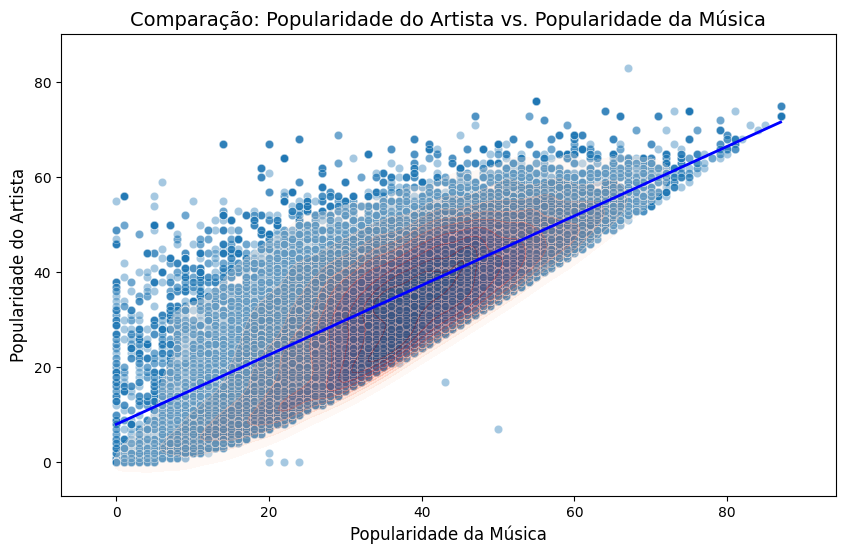

In [ ]:


# Criar o gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersão
sns.scatterplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity', 
    alpha=0.4  # Deixa os pontos mais transparentes para destacar a densidade
)

# Adicionar um mapa de densidade (contornos de KDE)
sns.kdeplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity', 
    cmap="Reds",  # Coloração do mapa de densidade
    fill=True,  # Preencher os contornos
    alpha=0.3   # Transparência do preenchimento
)

# Adicionar linha de tendência (regressão linear)
sns.regplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity',
    scatter=False,  # Apenas a linha, sem adicionar novos pontos
    color='blue', 
    line_kws={"linewidth": 2}
)

# Adicionar títulos e rótulos
plt.title("Comparação: Popularidade do Artista vs. Popularidade da Música", fontsize=14)
plt.xlabel("Popularidade da Música", fontsize=12)
plt.ylabel("Popularidade do Artista", fontsize=12)

# Mostrar o gráfico
plt.show()


COMPARAÇÃO DOS FATORES TRACKS E POPULARIDADE POR GENERO

    genres  popularity
0  Unknown   36.037073


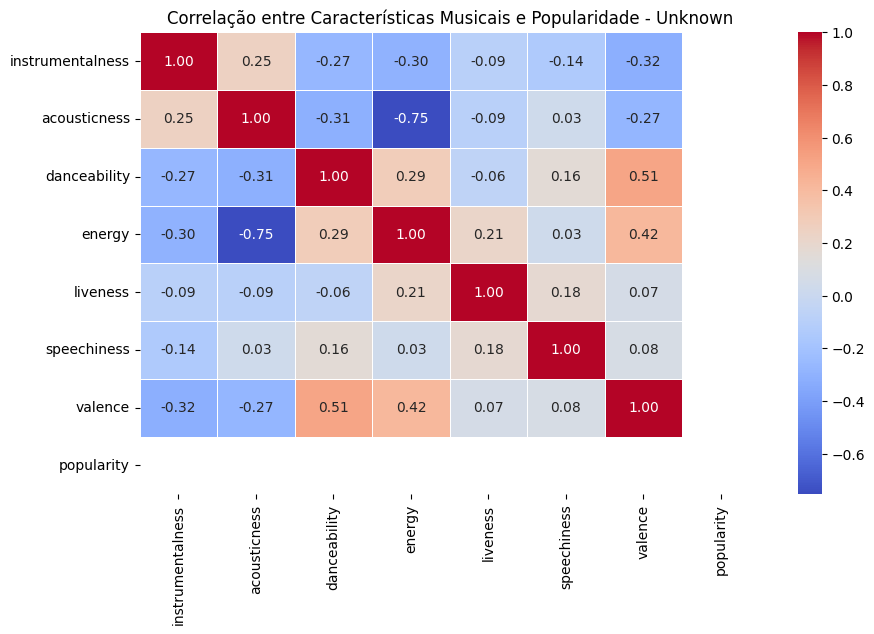

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remover valores nulos
df_filtered = df_final.dropna(subset=['genres', 'popularity'])

# Explodir a coluna de gêneros caso contenha múltiplos gêneros em uma única entrada
df_exploded = df_filtered.assign(genres=df_filtered['genres'].str.split(', ')).explode('genres')

# Calcular a popularidade média por gênero
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().reset_index()

# Selecionar os 6 gêneros com maior popularidade média
top_6_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(6)

# Criar heatmaps para os 6 gêneros mais populares
columns_heatmap = ['instrumentalness', 'acousticness', 'danceability', 'energy',
                   'liveness', 'speechiness', 'valence']

for genre in top_6_genres['genres']:
    # Filtrar as músicas do gênero
    df_genre = df_exploded[df_exploded['genres'] == genre].copy()
    
    # Substituir 'popularity' pela média do gênero
    df_genre['popularity'] = df_genre['popularity'].mean()
    
    # Calcular a correlação
    df_corr = df_genre[columns_heatmap + ['popularity']].corr()

    # Criar o heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    # Título do gráfico
    plt.title(f"Correlação entre Características Musicais e Popularidade - {genre}")
    
    # Mostrar o gráfico
    plt.show()


POPULARIDADE DO ALBUM X QUANTIDADE DE TRACKS

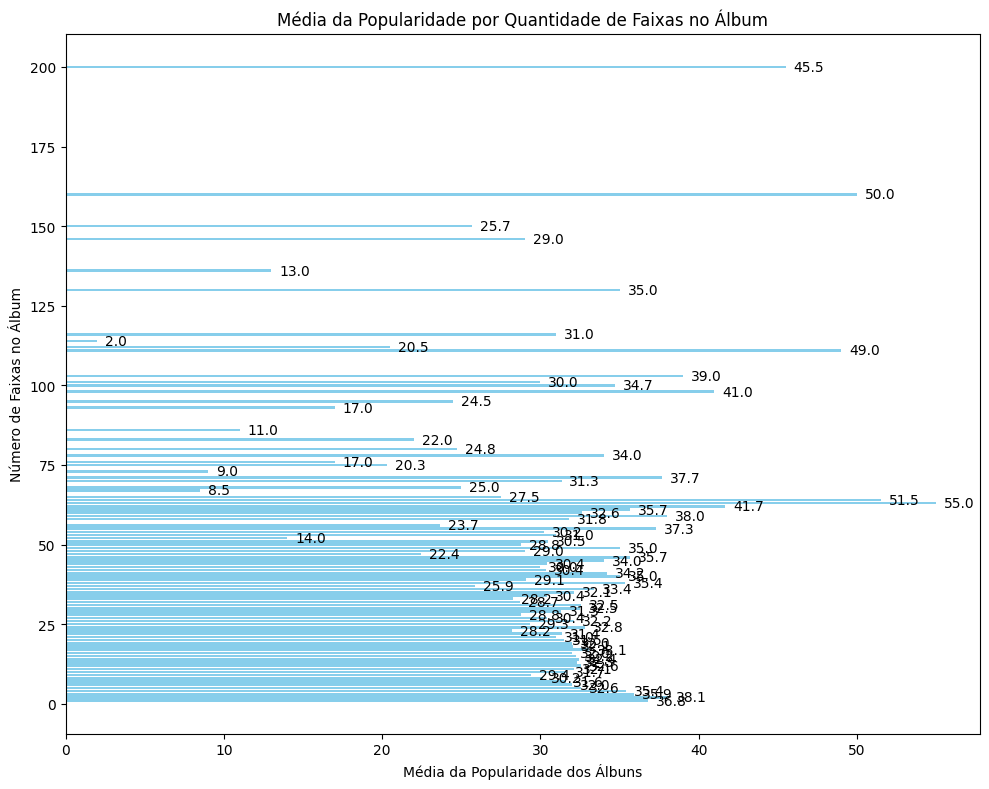

In [ ]:


# Calcular a média de popularidade por álbum
df_final['albuns_popularity'] = df_final.groupby('album_id')['popularity'].transform('mean')

# Garantir que cada álbum seja contado apenas uma vez
df_albums_unique = df_final[['album_id', 'total_tracks', 'albuns_popularity']].drop_duplicates(subset=['album_id'])

# Agrupar os álbuns pelo número de faixas e calcular a média da popularidade
df_grouped = df_albums_unique.groupby('total_tracks', as_index=False)['albuns_popularity'].mean()

# Ordenar os valores pelo número de faixas para melhor visualização
df_grouped = df_grouped.sort_values(by='total_tracks', ascending=True)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(df_grouped['total_tracks'], df_grouped['albuns_popularity'], color='skyblue')

# Adicionar rótulos com os valores da popularidade ao lado das barras
for bar, pop in zip(bars, df_grouped['albuns_popularity']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{pop:.1f}', va='center', fontsize=10)

# Configurações do gráfico
ax.set_xlabel("Média da Popularidade dos Álbuns")
ax.set_ylabel("Número de Faixas no Álbum")
ax.set_title("Média da Popularidade por Quantidade de Faixas no Álbum")
plt.tight_layout()

# Exibir o gráfico
plt.show()


Popularidade do álbum vs. Popularidade das músicas

C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\1480957904.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




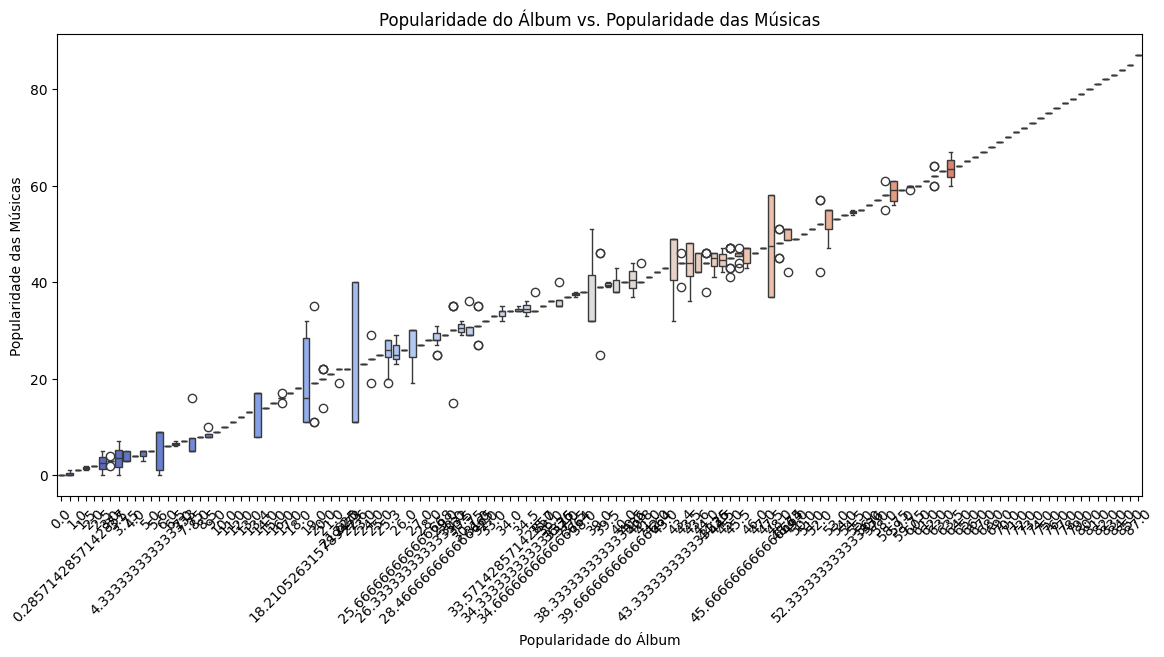

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final, x='albuns_popularity', y='popularity', palette='coolwarm')

# Configurações do gráfico
plt.title("Popularidade do Álbum vs. Popularidade das Músicas")
plt.xlabel("Popularidade do Álbum")
plt.ylabel("Popularidade das Músicas")
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização

plt.show()


Popularidade vs. Número de seguidores do artista

Popularidade vs. mes e dia de lançamento 

C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\3814825436.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



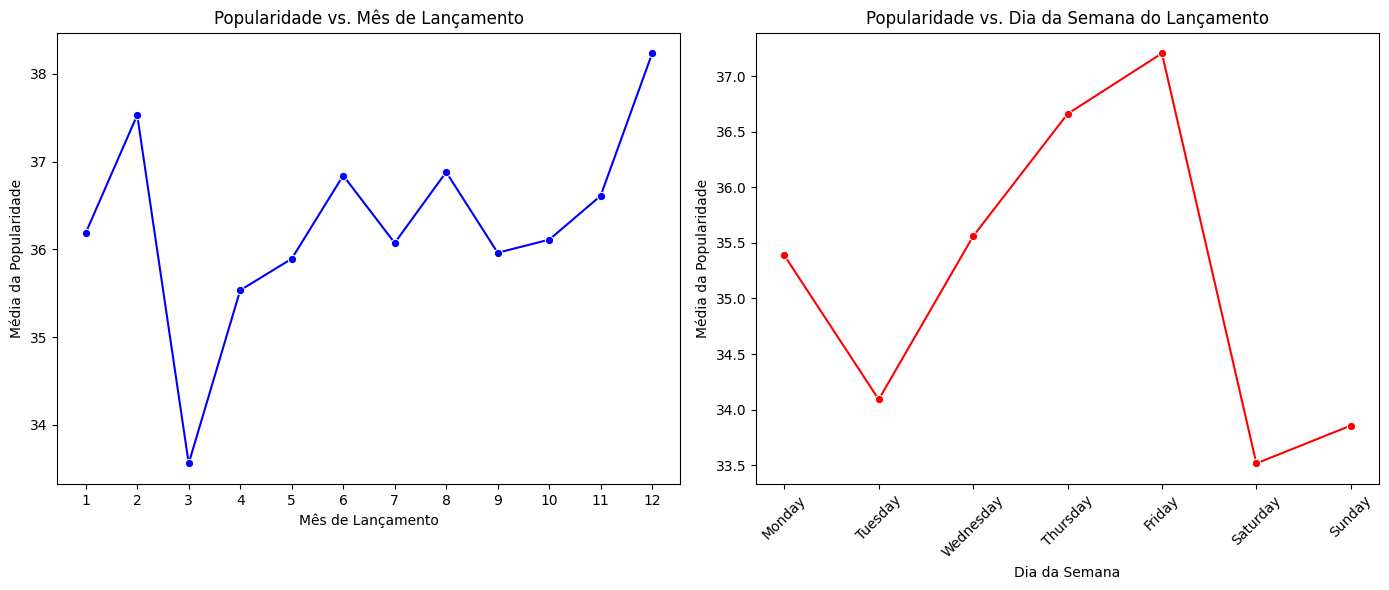

In [ ]:


# Converter a data de lançamento para formato datetime
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')

# Extrair mês e dia da semana do lançamento
df_final['release_month'] = df_final['release_date'].dt.month
df_final['release_weekday'] = df_final['release_date'].dt.day_name()  # Nome do dia da semana

# Ordenar os dias da semana corretamente
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Agrupar por mês e calcular a média da popularidade
monthly_popularity = df_final.groupby('release_month')['popularity'].mean()

# Agrupar por dia da semana e calcular a média da popularidade
weekday_popularity = df_final.groupby('release_weekday')['popularity'].mean().reindex(weekdays_order)

# Criar a figura com dois gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Line Plot - Popularidade vs. Mês de Lançamento
sns.lineplot(x=monthly_popularity.index, y=monthly_popularity.values, marker='o', ax=ax[0], color='blue')
ax[0].set_title("Popularidade vs. Mês de Lançamento")
ax[0].set_xlabel("Mês de Lançamento")
ax[0].set_ylabel("Média da Popularidade")
ax[0].set_xticks(range(1, 13))  # Garantir que todos os meses sejam mostrados

# 2️⃣ Line Plot - Popularidade vs. Dia da Semana do Lançamento
sns.lineplot(x=weekday_popularity.index, y=weekday_popularity.values, marker='o', ax=ax[1], color='red')
ax[1].set_title("Popularidade vs. Dia da Semana do Lançamento")
ax[1].set_xlabel("Dia da Semana")
ax[1].set_ylabel("Média da Popularidade")
ax[1].set_xticklabels(weekdays_order, rotation=45)  # Rotacionar para melhor visualização

plt.tight_layout()
plt.show()


Popularidade vs. Duração da Música

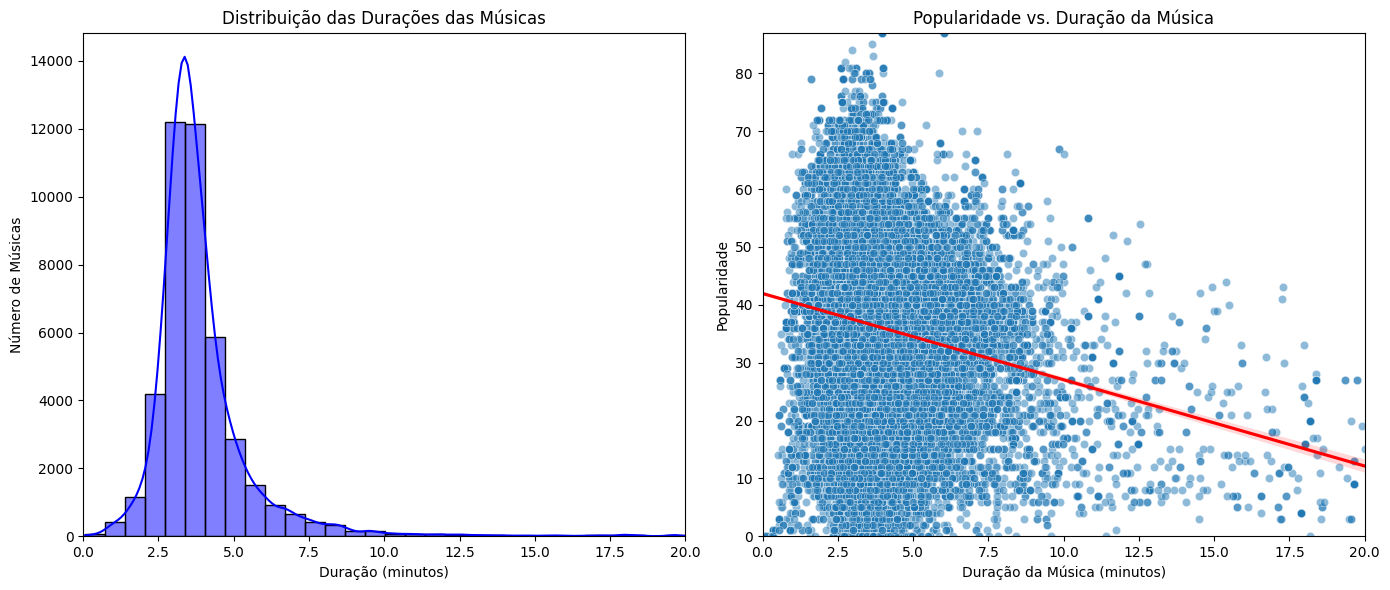

In [ ]:


# Converter duração para minutos
df_final['duration_min'] = df_final['duration_ms'] / 60000  

# Filtrar músicas com no máximo 20 minutos
df_filtered = df_final[df_final['duration_min'] <= 20]

# Criar a figura
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Histograma - Distribuição das Durações (até 20 min)
sns.histplot(df_filtered['duration_min'], bins=30, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Distribuição das Durações das Músicas")
ax[0].set_xlabel("Duração (minutos)")
ax[0].set_ylabel("Número de Músicas")
ax[0].set_xlim(0, 20)  # Limitar o eixo X até 20 minutos

# 2️⃣ Scatter Plot - Popularidade vs. Duração (até 20 min)
sns.scatterplot(data=df_filtered, x='duration_min', y='popularity', alpha=0.5, ax=ax[1])
sns.regplot(data=df_filtered, x='duration_min', y='popularity', scatter=False, color='red', ax=ax[1])
ax[1].set_title("Popularidade vs. Duração da Música")
ax[1].set_xlabel("Duração da Música (minutos)")
ax[1].set_ylabel("Popularidade")
ax[1].set_xlim(0, 20)  # Limitar o eixo X até 20 minutos
ax[1].set_ylim(0, df_filtered['popularity'].max())  # Remover valores negativos do eixo Y

plt.tight_layout()
plt.show()


Popularidade Média por Gênero

C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\2202015015.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




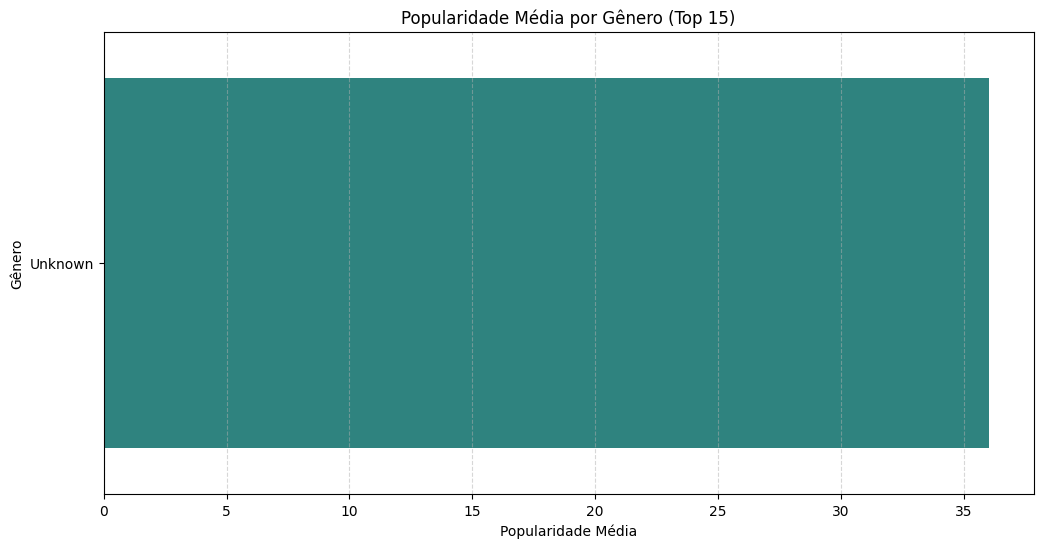

In [ ]:
from collections import Counter

# Função para limpar os gêneros, removendo possíveis siglas de países
def limpar_generos(generos):
    stopwords_paises = {'us', 'br', 'uk', 'fr', 'de', 'es', 'it', 'jp', 'cn', 'ru'}  # Adicione mais siglas se necessário
    generos_limp = [g for g in generos if g not in stopwords_paises]
    return generos_limp

# Expandir a lista de gêneros e remover siglas de países
df_exploded = df_final.explode('genres')  # Transforma listas em linhas individuais
df_exploded['genres'] = df_exploded['genres'].apply(lambda x: limpar_generos([x])[0] if isinstance(x, str) else '')

# Calcular popularidade média por gênero
popularidade_por_genero = df_exploded.groupby('genres')['popularity'].mean().reset_index()

# Filtrar apenas gêneros com mais de um caractere (removendo siglas que sobraram)
popularidade_por_genero = popularidade_por_genero[popularidade_por_genero['genres'].str.len() > 2]

# Ordenar do mais popular para o menos popular
popularidade_por_genero = popularidade_por_genero.sort_values(by='popularity', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=popularidade_por_genero.head(15), x='popularity', y='genres', palette='viridis')

# Ajustes visuais
plt.title('Popularidade Média por Gênero (Top 15)')
plt.xlabel('Popularidade Média')
plt.ylabel('Gênero')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()


Músicas Disponíveis em Muitos Mercados São Mais Populares

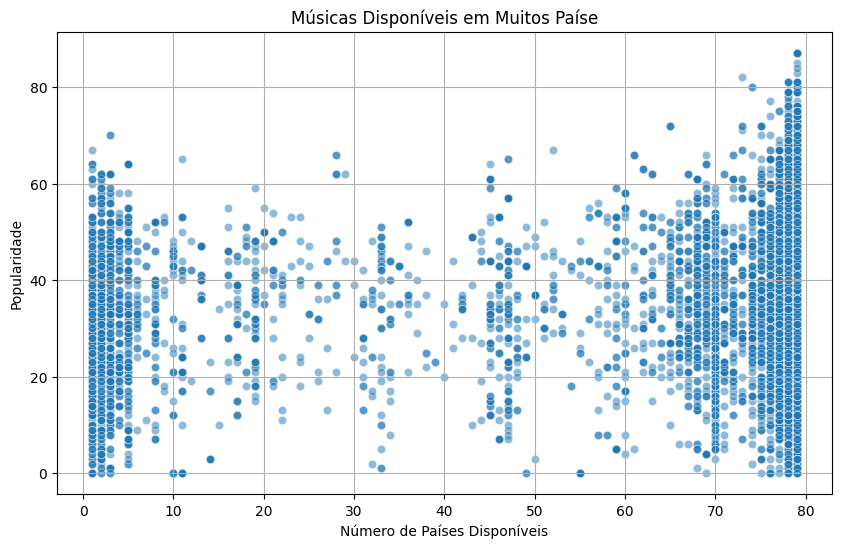

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar o número de países onde cada música está disponível
df_final['num_countries'] = df_final['available_markets_tck'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='num_countries', y='popularity', alpha=0.5)

# Ajustes visuais
plt.title('Músicas Disponíveis em Muitos Paíse')
plt.xlabel('Número de Países Disponíveis')
plt.ylabel('Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()


Posição na Tracklist e Popularidade

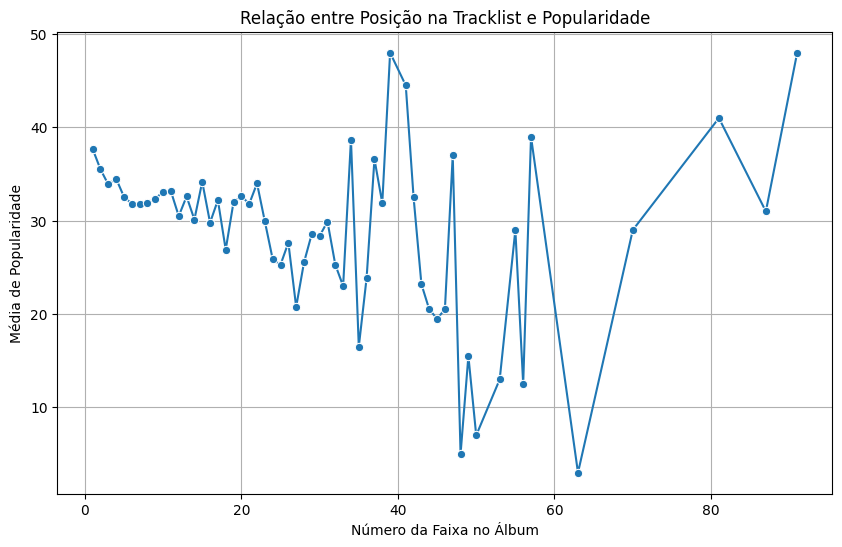

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média de popularidade por posição na tracklist
tracklist_popularity = df_final.groupby('track_number')['popularity'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=tracklist_popularity, x='track_number', y='popularity', marker='o')

# Ajustes visuais
plt.title('Relação entre Posição na Tracklist e Popularidade')
plt.xlabel('Número da Faixa no Álbum')
plt.ylabel('Média de Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()



Álbuns com mais faixas são mais populares?

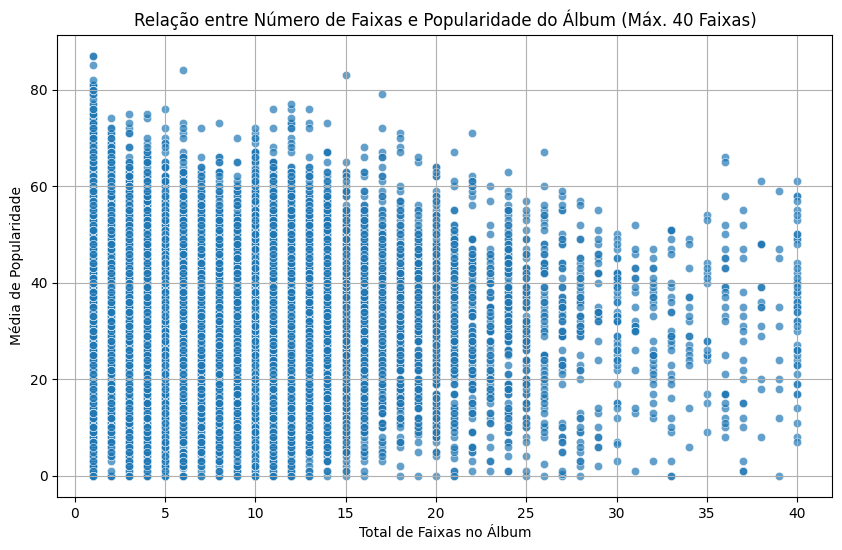

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar álbuns com até 40 faixas
album_popularity = df_final.groupby('album_id').agg({'total_tracks': 'first', 'popularity': 'mean'}).reset_index()
album_popularity = album_popularity[album_popularity['total_tracks'] <= 40]

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=album_popularity, x='total_tracks', y='popularity', alpha=0.7)

# Ajustes visuais
plt.title('Relação entre Número de Faixas e Popularidade do Álbum (Máx. 40 Faixas)')
plt.xlabel('Total de Faixas no Álbum')
plt.ylabel('Média de Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()



Número de Seguidores do Artista vs. Popularidade da Música

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por artista e calcular a média da popularidade das músicas
df_artist_avg_popularity = df_final.groupby('artist_id', as_index=False).agg({
    'popularity': 'mean',  # Média da popularidade das músicas
    'followers': 'first'   # Pegar o número de seguidores (assumindo que é o mesmo para todas as músicas do artista)
})

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_artist_avg_popularity, x='followers', y='popularity', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel("Número de Seguidores do Artista")
plt.ylabel("Média da Popularidade das Músicas do Artista")
plt.title("Número de Seguidores do Artista vs. Média da Popularidade das Músicas")

# Exibir gráfico
plt.show()

NameError: name 'df_final' is not defined

 Comparação de Popularidade entre Artistas Solo e Bandas


C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\1697988661.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




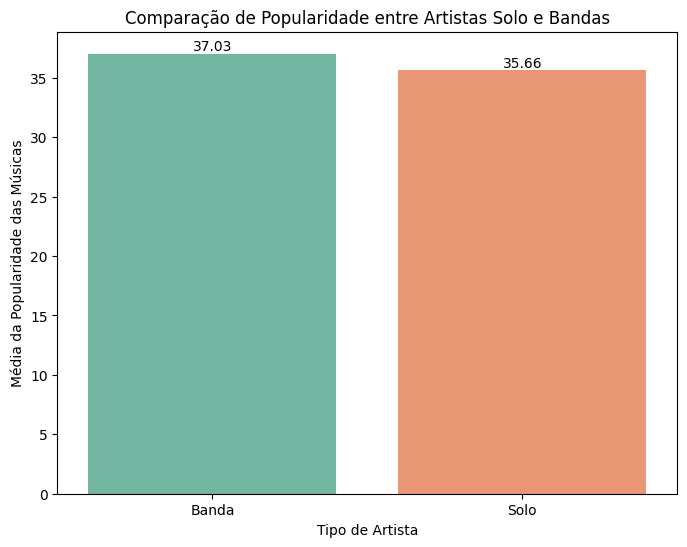

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para classificar artistas como solo ou banda
def classify_artist(artists_id):
    if isinstance(artists_id, str) and ',' in artists_id:  # Se houver múltiplos IDs, é uma banda
        return 'Banda'
    else:
        return 'Solo'

# Criar uma nova coluna para classificar os artistas
df_final['artist_type'] = df_final['artists_id'].apply(classify_artist)

# Calcular a média da popularidade para cada grupo (solo e banda)
avg_popularity = df_final.groupby('artist_type')['popularity'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_popularity, x='artist_type', y='popularity', palette='Set2')

# Adicionando rótulos e título
plt.xlabel("Tipo de Artista")
plt.ylabel("Média da Popularidade das Músicas")
plt.title("Comparação de Popularidade entre Artistas Solo e Bandas")

# Adicionar os valores das médias nas barras
for index, row in avg_popularity.iterrows():
    plt.text(index, row['popularity'], f"{row['popularity']:.2f}", ha='center', va='bottom')

# Exibir gráfico
plt.show()

 Popularidade por Tipo de Álbum (Single, Álbum, Compilation)


C:\Users\mathe\AppData\Local\Temp\ipykernel_10688\1897908867.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




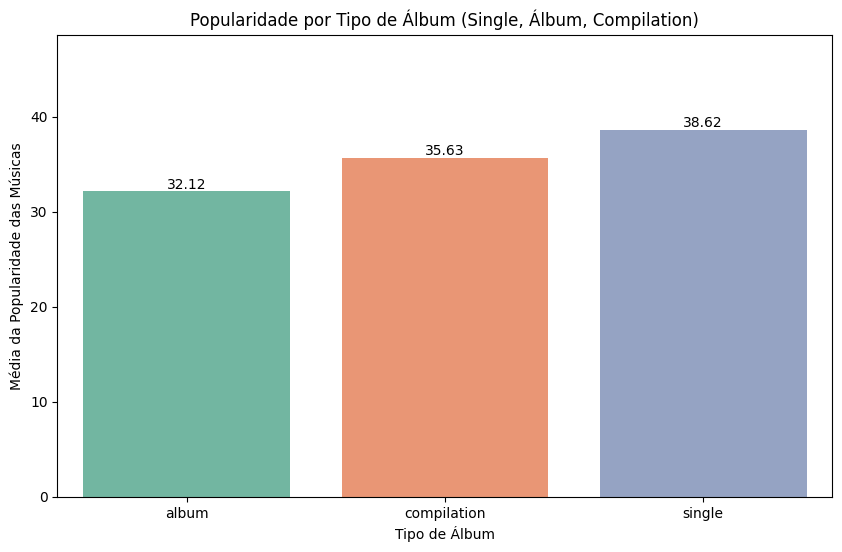

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular a média da popularidade para cada tipo de álbum
avg_popularity_by_album_type = df_final.groupby('album_type')['popularity'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_popularity_by_album_type, x='album_type', y='popularity', palette='Set2')

# Adicionando rótulos e título
plt.xlabel("Tipo de Álbum")
plt.ylabel("Média da Popularidade das Músicas")
plt.title("Popularidade por Tipo de Álbum (Single, Álbum, Compilation)")

# Adicionar os valores das médias nas barras
for index, row in avg_popularity_by_album_type.iterrows():
    plt.text(index, row['popularity'], f"{row['popularity']:.2f}", ha='center', va='bottom')

# Ajustar a escala do eixo y para melhor visualização
plt.ylim(0, avg_popularity_by_album_type['popularity'].max() + 10)

# Exibir gráfico
plt.show()

PAIS DE ORIGEM DO ARTISTA E POPULARIDADE DO ARTISTA TOP 10

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover valores nulos e garantir que o país tem pelo menos 5 artistas para evitar distorções
df_filtered = df_final.dropna(subset=['country', 'artist_popularity'])

# Contar quantos artistas tem cada país
country_counts = df_filtered['country'].value_counts()

# Manter apenas países com pelo menos 5 artistas (evita viés de países com poucos dados)
valid_countries = country_counts[country_counts >= 5].index
df_filtered = df_filtered[df_filtered['country'].isin(valid_countries)]

# Agrupar por país e calcular a média da popularidade dos artistas
top_countries = df_filtered.groupby('country')['artist_popularity'].mean().reset_index()

# Selecionar os 15 países com a maior média de popularidade
top_countries = top_countries.sort_values(by='artist_popularity', ascending=False).head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries, 
    x='artist_popularity', 
    y='country', 
    palette='coolwarm'
)

# Adicionar títulos e rótulos
plt.title("Top 15 Países de Origem dos Artistas por Popularidade Média", fontsize=14)
plt.xlabel("Popularidade Média do Artista", fontsize=12)
plt.ylabel("País de Origem", fontsize=12)

# Exibir o gráfico
plt.show()


NameError: name 'df_final' is not defined